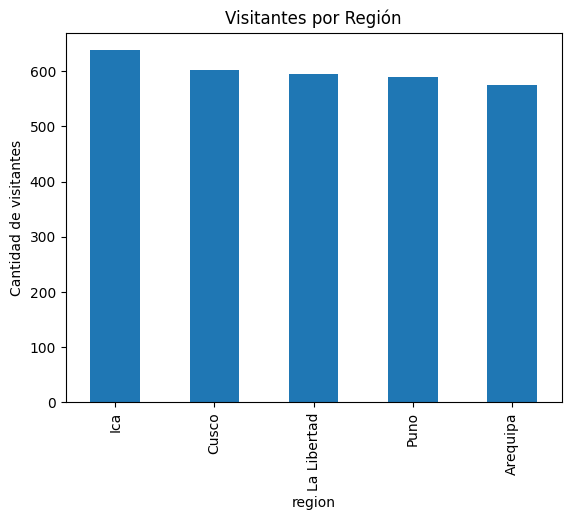

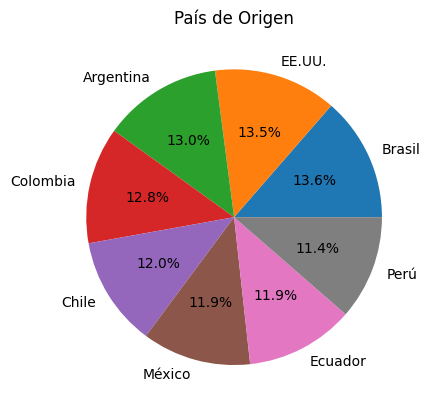

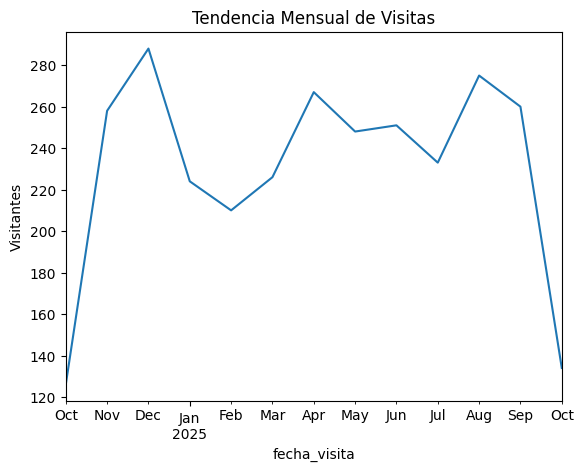

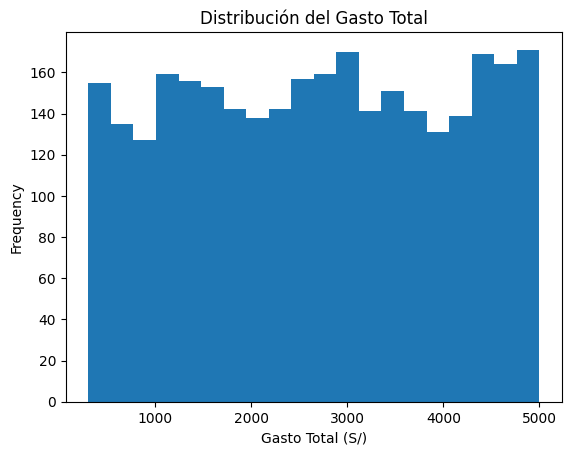

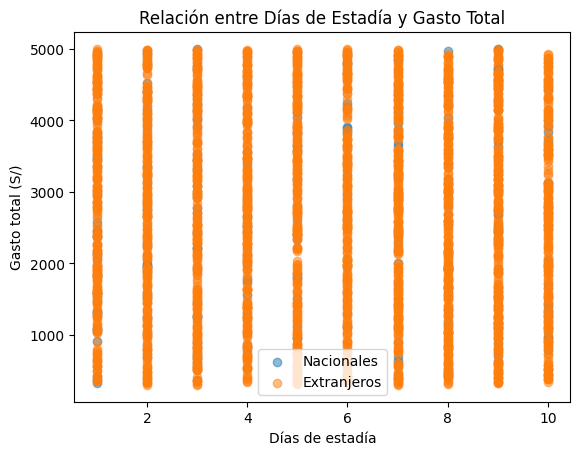

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def main():
    root = Path.cwd().parent
    data_path = root / "data"
    df = pd.read_csv(data_path / "visitantes_clean.csv")

    # 1Ô∏è‚É£ Barras - visitantes por regi√≥n
    df["region"].value_counts().plot(kind="bar", title="Visitantes por Regi√≥n")
    plt.ylabel("Cantidad de visitantes")
    plt.show()

    # 2Ô∏è‚É£ Circular - distribuci√≥n por pa√≠s
    df["pais_origen"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Pa√≠s de Origen")
    plt.ylabel("")
    plt.show()

    # 3Ô∏è‚É£ L√≠nea - tendencia mensual
    df["fecha_visita"] = pd.to_datetime(df["fecha_visita"])
    df.groupby(df["fecha_visita"].dt.to_period("M")).size().plot(kind="line", title="Tendencia Mensual de Visitas")
    plt.ylabel("Visitantes")
    plt.show()

    # 4Ô∏è‚É£ Histograma - gasto promedio
    df["gasto_total"].plot(kind="hist", bins=20, title="Distribuci√≥n del Gasto Total")
    plt.xlabel("Gasto Total (S/)")
    plt.show()

    # üí° Extra - relaci√≥n d√≠as vs gasto (scatter)
    nacionales = df[df["pais_origen"] == "Per√∫"]
    extranjeros = df[df["pais_origen"] != "Per√∫"]

    plt.scatter(nacionales["dias_estadia"], nacionales["gasto_total"], alpha=0.5, label="Nacionales")
    plt.scatter(extranjeros["dias_estadia"], extranjeros["gasto_total"], alpha=0.5, label="Extranjeros")
    plt.title("Relaci√≥n entre D√≠as de Estad√≠a y Gasto Total")
    plt.xlabel("D√≠as de estad√≠a")
    plt.ylabel("Gasto total (S/)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
